# Address completeness classification with traditional programming techniques
Data & AI course, UC Leuven, 2021 Fall
### Project supervisors
- Tom Magerman
- Aimée Lynn Backiel

### Project team (Group 4)
- Karolis Medekša
- Pedro Teixeira Palma Rosa
- Hysa Mello de Alcântara
- Josep Jacob Chetrit Valdepeñas

## Goals
The goal if the assignment to implement a Python program that is capable of determining whether a provided street address is complete (having a street name, house/apartment number, postal code, city) or incomplete (missing any of previously mentioned criteria).

# Implementation
The first step of solving the problem is reading the input file into an object of `pandas.DataFrame`. Function `read_DataFrame_from_file` is responsible for that. While doing the exercise it is also convenient to output the data table to excel for an easier inspection, `write_DataFrame_to_excel` is responsible for that, the function not only outputs the data frame to an excel file, but also adds additional formatting, for instance, coloring rows of complete addresses in green and those that are incomplete - in red.  

In [1]:
import pandas as pd

DATA_INPUT_FILENAME = 'input.txt'
DATA_OUTPUT_FILENAME = 'classified.xlsx'

def read_DataFrame_from_file():
    return pd.read_csv(DATA_INPUT_FILENAME, delimiter='\t')


def write_DataFrame_to_excel(df: pd.DataFrame):
    sheet_name = 'Classified'

    with pd.ExcelWriter(DATA_OUTPUT_FILENAME, engine='xlsxwriter') as writer:
        df.to_excel(writer, sheet_name=sheet_name, index=False)
        
        worksheet = writer.sheets[sheet_name]
        # format all data as a table
        worksheet.add_table(0, 0, df.shape[0], df.shape[1]-1, {
            'columns': [{'header': col_name} for col_name in df.columns],
            'style': 'Table Style Medium 5'
        })
        # Widen the address column
        worksheet.set_column('C:C', 70)

        # Add formatting - red for negative, green - for positive qualification
        redFormat = writer.book.add_format({'bg_color': '#FF0000', 'font_color': '#000000'})
        greenFormat = writer.book.add_format({'bg_color': '#00B050', 'font_color': '#000000'})
        worksheet.conditional_format(0, 0, df.shape[0], df.shape[1]-1, {'type': 'formula',
                                          'criteria': '=$E1=0',
                                          'format': redFormat})
        worksheet.conditional_format(0, 0, df.shape[0], df.shape[1]-1, {'type': 'formula',
                                          'criteria': '=$E1=1',
                                          'format': greenFormat})

With the simplest possible strategy of classification (label all addresses as incomplete) we can verify that input/output behavior is working correctly

In [2]:
def classify_address(dataFrame: pd.DataFrame):
    dataFrame['complete'] = 0
    return dataFrame


def init():
    classified = classify_address(read_DataFrame_from_file())
    write_DataFrame_to_excel(classified)


init()

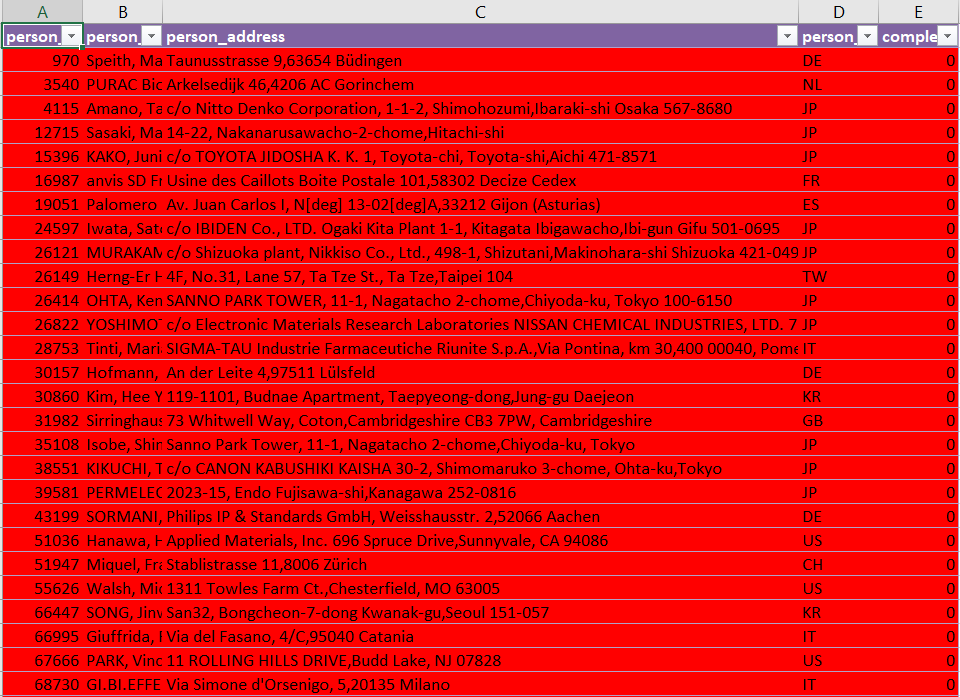